In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from OptionPlayTranslator import *

In [2]:

# srcDataFrame = pd.read_csv('optionsDX/aapl_2022/aapl_eod_2022q4-86egbl/aapl_eod_202210.txt')
srcDataFrame = pd.read_csv('tslaReduced.csv')

df = pd.DataFrame(srcDataFrame)
df.columns = df.columns.str.strip()

/var/folders/p_/r9zh86p106b8yh2ly8zzjbw00000gn/T/ipykernel_30304/155347403.py:2: DtypeWarning: Columns (4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  srcDataFrame = pd.read_csv('tslaReduced.csv')


In [3]:
dayGroups = df.groupby('[QUOTE_DATE]')

In [4]:

opt = OPT('TSLA', dayGroups)
print(opt.ticker)
opt.find_plays(' 2019-10-01', ' 2020-01-16',200)

TSLA
TSLA on  2019-10-01 predicted to be 200 on  2020-01-16
Baseline (shares): 109.965% P/L:$2099.  Option PnL: -100.0% P/L: $0. Result for options:$-2099.65



(2099.648348053647, 0.0, -2099.648348053647, -0.1822047759241086)

In [5]:
predictions = pd.read_csv('tsla_predictions.csv')
x = predictions.iloc[30]

In [6]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',100, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])

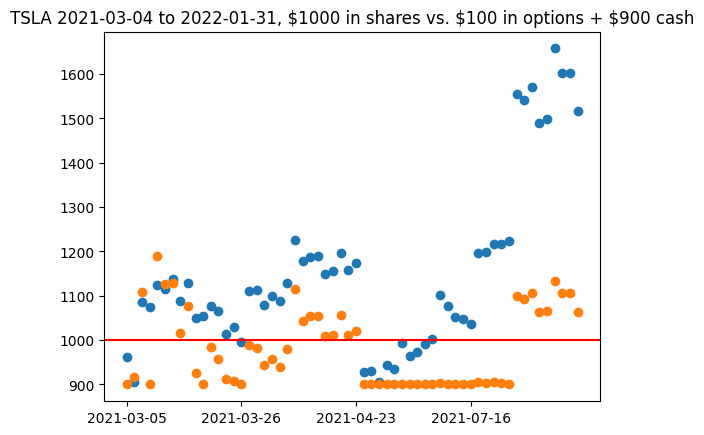

In [7]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $100 in options + $900 cash')
plt.xticks(range(0,60,15))
plt.axhline(y=1000, color='r', linestyle='-')

In [8]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])


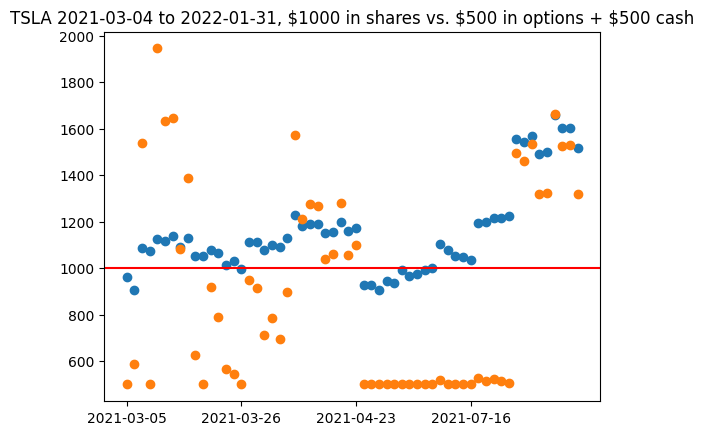

In [9]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $500 in options + $500 cash')
plt.xticks(range(0,60,15))
plt.axhline(y=1000, color='r', linestyle='-')

In [20]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_returns = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_returns.append(play[3])
# plt.scatter(pred_dates, sharePnL, label='Share PnL')
# plt.scatter(pred_dates, optionPnL, label='Option PnL')
# plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs.$1000 in options + $0 cash')
# plt.xticks(range(0,60,15))
# plt.axhline(y=1000, color='g', linestyle='-')
# plt.axhline(y=1000, color='r', linestyle='-')

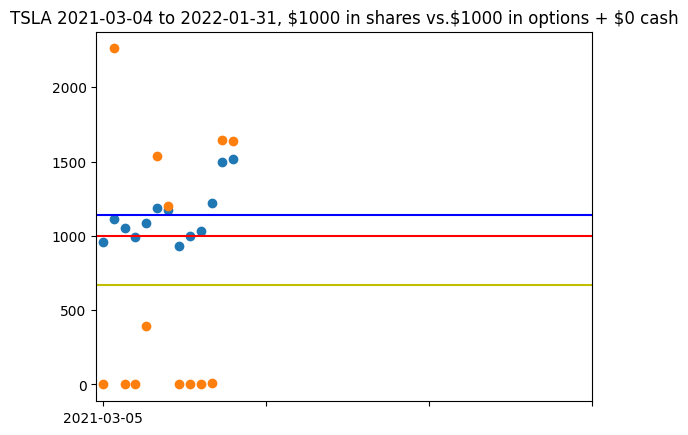

In [21]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs.$1000 in options + $0 cash')
plt.xticks(range(0,60,15))
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-')